# Machine Learning (laboratory instruction)
## Classification metrics

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 05-Multiclass classification.ipynb
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal.

Multi-class classification.

In previous laboratory you made a binary classifier. Such classifier assigns one of two labels to samples. In many machine learning applications there is a need to classify samples into more than two groups. This kind of classification is called multi-class classification.

### Task 0. Read the data.

Read the data from file `animals.npz`.
It is a data read from 20 sensors attached to the animal head. The sensors were put on multiple animals, and data has been collected and annotated.

**Tip**: You can use below code to read the data:

```python
import sklearn.datasets
import numpy as np
from tqdm import tqdm

with open('animals.npz', 'rb') as f:
    data = np.load(f)
    x_train, x_test, y_train, y_test, classes = data['x_train'], data['x_test'], data['y_train'], data['y_test'], data['classes']
```
```



In [1]:
# >>> WRITE YOUR CODE BELOW <<<
import sklearn.datasets
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('animals.npz', 'rb') as f:
    data = np.load(f)
    x_train, x_test, y_train, y_test, classes = data['x_train'], data['x_test'], data['y_train'], data['y_test'], data['classes']

k = len(classes)


### Task 1. Data preprocessing - one-hot encoding.
To perform multi-class classification we need to prepare the data. We are about to predict the probability that particular sample belongs to one of $k$ classes. In this case, we expect that the result contains $k$ numbers where each tells the probability that the sample belongs to such class. Perfectly, if the sample belongs to the class the model returns 1 and zeros for other classes.

Before we start training the data should be prepared properly. For this case implement one-hot encoding function that will perform the below operation:

$$
\begin{align}
z_{i=0 \cdots k-1}(x) = \begin{cases}
1&\text{if $x=i$}\\
0&\text{if otherwise}\\
\end{cases}
\end{align}
$$

, where $k$ is the number of classes, $z$ if the one-hot vector and x if the number (index) of class.

Example ($k=6$):

| x     | z           |
| :---- |       ---:  |
| 2     | 0 0 1 0 0 0 |
| 5     | 0 0 0 0 0 1 |
| 1     | 0 1 0 0 0 0 |
| 0     | 1 0 0 0 0 0 |

*Note: it is worth to add bias feature at this point.*

In [2]:
# >>> WRITE YOUR CODE BELOW <<<
def oneHotEncode(input, hot_classes):
    OHE = []
    for i in input:
        hot = np.zeros(hot_classes)
        hot[i] = 1
        OHE.append(hot)
    return np.array(OHE)

y_train_hot = oneHotEncode(y_train, k)
y_test_hot = oneHotEncode(y_test, k)

print(f"{y_train_hot=}, \n {y_test_hot=}")

y_train_hot=array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]]), 
 y_test_hot=array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])


### Task 2. Softmax.

The logistic regression uses the sigmoid function to classify the sample into one of two groups. This time we want to assign one of >2 labels to sample. For this case, implement the softmax function that returns a vector of probabilities:

$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j}^{k-1}e^{z_j}}
$$

, where $z$ is the vector that contains the scores, and $k$ is the number of classes.

*Note: $\sum\sigma(z) = 1$.*

In [3]:
# >>> WRITE YOUR CODE BELOW <<<
def softmax(z):
    probabilities = []
    denom = 0
    for i in range (0, k):
        denom += np.exp(z[i])
    for j in z:
        prob = np.exp(j)/denom
        probabilities.append(prob)
    return np.array(probabilities)

def softmax_sum(smax_sum):
    soft = []
    for z in smax_sum:
        soft.append(softmax(z))
    return np.array(soft)

train_theta = np.random.randn(x_train.shape[1], k)
y_train_predict = x_train @ train_theta

test_theta = np.random.randn(x_test.shape[1], k)
y_test_predict = x_test @ test_theta

y_train_predict_soft = softmax_sum(y_train_predict)
y_test_predict_soft = softmax_sum(y_test_predict)

### Task 3. Train the model.

To train the model we will use the cross-entropy cost function:

$$
c(\theta) =
- \dfrac{1}{m}\sum\limits_{i}^{m-1}\sum\limits_{k}^{K-1}{t_k^{(i)}\log\left(y_k^{(i)}\right)}
$$

, where $K$ is the number of classes, $m$ is the number of samples, $t$ is the ground truth (expected) values, $y$ is the prediction (predicted values).

The equation for the gradient:

$$
\nabla_{\mathbf{\theta}^{(k)}} \, c(\theta) = \dfrac{1}{m} \sum\limits_{i}^{m-1}{ \left ( y^{(i)}_k - t_k^{(i)} \right ) \mathbf{x}^{(i)}}
$$

*Note: the $log(0)$ returns `-inf`, so you may need to add tiny value to avoid it.*

*Note 2: for vectorized form you may need to specify the `axis` parameter for functions such as `sum` or `mean`.*

In [4]:
# >>> WRITE YOUR CODE BELOW <<<
def cost_fun(predicted, actual):
    log = np.log(predicted)
    mul1 = actual * log
    sum = np.sum(mul1)
    sum = np.sum(sum)
    res = sum / len(predicted)
    return -res

cost_fun(y_train_predict_soft, y_test_hot)

def gradient(predicted, actual, x):
    dif = predicted - actual
    mul2 = x.T @ dif
    return mul2/len(predicted)

### Task 4. Results.

* Display the training and testing loss.
* Calculate the accuracy score.

In [5]:
# >>> WRITE YOUR CODE BELOW <<<
def model(x, y_hot, alpha, epochs):
    theta = np.random.randn(x.shape[1], k)
    m = len(x)
    costs = []
    test_costs = []
    acc = []
    acc_test = []
    for i in range(0, epochs):

        pred = x @ theta
        pred_soft = softmax_sum(pred)

        gr = gradient(pred_soft, y_hot, x)
        theta -= alpha * gr

        test_pred = x_test @ theta
        test_soft_pred = softmax_sum(test_pred)

        acc.append(accuracy(pred_soft, y_hot))
        acc_test.append(accuracy(test_soft_pred, y_test_hot))
    
        costs.append(cost_fun(pred_soft, y_hot))
        test_costs.append(cost_fun(test_soft_pred, y_test_hot))
    return costs, test_costs, acc, acc_test, theta

def accuracy(pred, actual):
    good = 0
    for i in range(len(pred)):
        pred_sample = pred[i]
        actual_sample = actual[i]
        for j in range(len(actual_sample)):
            if actual_sample[j]==1 and pred_sample[j]>0.5:
                good += 1
    return good / len(pred)


Cost = 0.9149893643476487, test_cost = 1.0021748505754098
Accuracy = 0.47, accuracy_test = 0.462


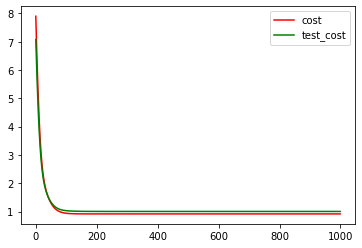

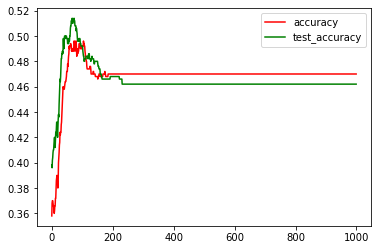

In [7]:
alpha = 0.2
epochs = 1000

cost, test_cost, acc, acc_test, theta = model(x_train, y_train_hot, alpha, epochs)

print(f"Cost = {cost[-1]}, test_cost = {test_cost[-1]}")
print(f"Accuracy = {acc[-1]}, accuracy_test = {acc_test[-1]}")

plt.plot(range(epochs),cost, color="red", label="cost")
plt.plot(range(epochs),test_cost, color="green", label="test_cost")
plt.legend()
plt.show()

plt.plot(range(epochs),acc, c="red", label="accuracy")
plt.plot(range(epochs),acc_test, color="green", label="test_accuracy")
plt.legend()
plt.show()